# Experiments on Hydra Model

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

# import pandas as pd
import modin.pandas as pd
import time

from hydramuscle.model.smc import SMC
from hydramuscle.model.shell import Shell
from hydramuscle.postprocessing.force_encoder_2d import ForceEncoder2D

from hydramuscle.postprocessing.visualizer.save_video_parallel import *
from hydramuscle.postprocessing.visualizer.vlib import *

In [2]:
TOTAL_TIME = 100
TIME_STEP = 0.0002
PARAM_K2 = 0.1
PARAM_S0 = 400
PARAM_D = 40e-4
PARAM_V7 = 0.01
BEHAVIOR = 'contraction burst'
NUMX = 200
NUMY = 200
SAVE_INTERVAL = 50
STIMS_FAST = [1,3,5,7,9,12,15,18,22,26,31,36,42]
STIMS_SLOW = []

PROJECT = "c_200x200_100s_test_elongation"
NUMX = 200
NUMY = 200
TARGETFPS = 400

In [2]:
########## Test modin.pandas ###################
# import modin.pandas as pd
# import time
# import pandas

# start = time.time()
# pd.read_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/c_200x200_100s_ele_bottom_200_conductance.csv')
# print(time.time() - start)

# start = time.time()
# pandas.read_csv('/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/c_200x200_100s_ele_bottom_200_conductance.csv')
# print(time.time() - start)

## 100s, 389s

## 1. Test Active Elongation -- Sustained Ca Influx through LTCC

### 1.1 Load Data

In [3]:
PROJECT = "c_200x200_100s_test_elongation"

# Load Calcium Data
SOURCE = "/media/hengji/DATA/Data/Documents/hydramuscle/results/data/calcium/"+PROJECT+".csv"
start = time.time()
c = pd.read_csv(SOURCE)
print(time.time() - start)
c = c.values

# Encode Calcium Data into Force Data
ENCODE_INTERVAL = TIME_STEP*SAVE_INTERVAL
force = ForceEncoder2D.encode(c, NUMX, NUMY, ENCODE_INTERVAL)

  0%|          | 16/10001 [00:00<01:04, 155.19it/s]

388.17361974716187


100%|██████████| 10001/10001 [01:06<00:00, 149.31it/s]


In [6]:
# Check Data Format
print(c.shape)
print(force.shape)

(10001, 40000)
(10001, 40000)


### 1.2 Visualize Data as Frames

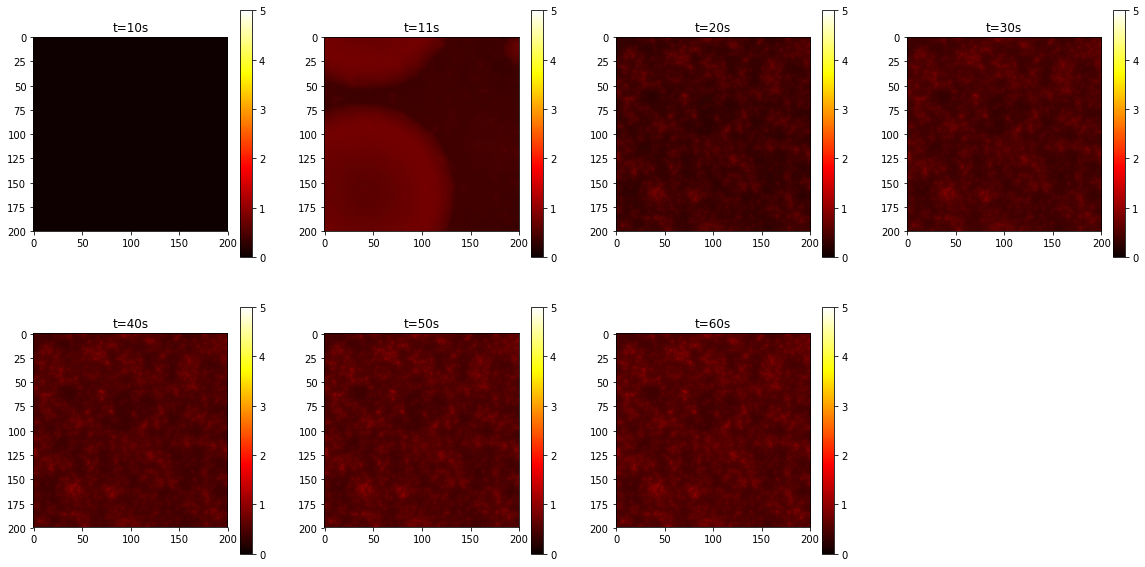

In [7]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 11, 20, 30, 40, 50, 60]
plot_frames(c, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 5)

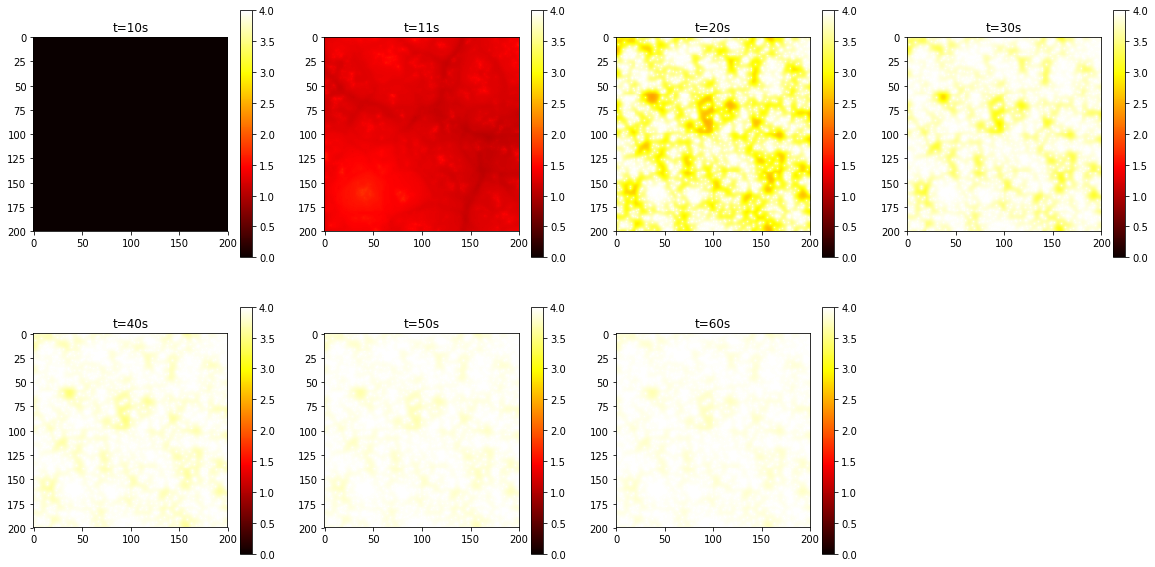

In [10]:
# TIME_LIST = [t+0.1 for t in STIMS_FAST[:8]]
TIME_LIST = [10, 11, 20, 30, 40, 50, 60]
plot_frames(force, NUMX, NUMY, TIME_LIST, TIME_STEP*SAVE_INTERVAL, 0, 4)

### 1.3 Visualize Data as Curves

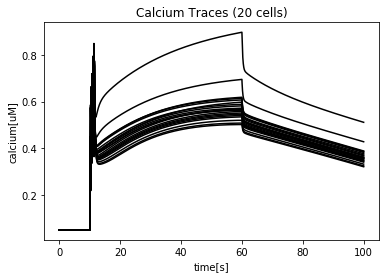

In [12]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=c[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium[uM]",
           title="Calcium Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

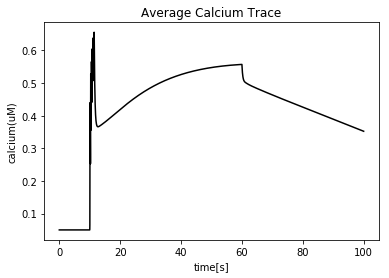

In [15]:
save_curve(x=np.mean(c, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="calcium(uM)",
           title="Average Calcium Trace",
           filename=None,
           show=True, 
           save=False)

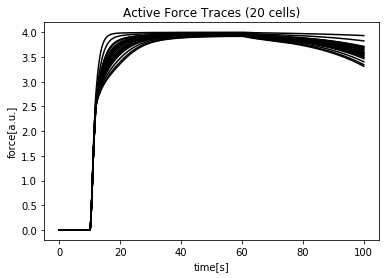

In [13]:
I_X = 0
I_Y = 10

index = I_X*NUMX + I_Y
save_curve(x=force[:,9990:10010],
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force[a.u.]",
           title="Active Force Traces (20 cells)",
           filename=None,
           show=True, 
           save=False)

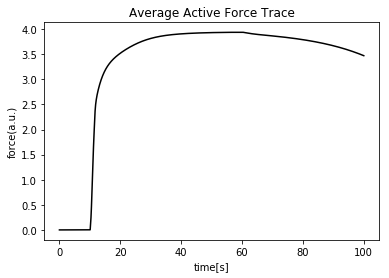

In [14]:
save_curve(x=np.mean(force, axis=1),
           dt=TIME_STEP*SAVE_INTERVAL,
           xlabel="time[s]",
           ylabel="force(a.u.)",
           title="Average Active Force Trace",
           filename=None,
           show=True, 
           save=False)

## 2. Test Active Elongation -- IP3-induced Ca Release

## 3. Test Contraction Bursts -- Stimulated Bottom Ring with gc=200

## 4. Test Contraction Bursts -- Stimulated Random Cells with gc=200